Este es el ETL de reviews de Google Maps sobre el estado de Florida, EEUU. Recordar que fué realizado en un Colab e google drive, ya que los datos los teníamos allí subidos.

In [ ]:
#comenzando conectando el Colab con google drive
from google.colab import drive
drive.mount('/content/drive')

Ahora importo todos los datasets en distintas variables, para luego concatenarlos ya que todos cuentan con las mismas columnas

In [ ]:
import pandas as pd

file_path1 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 1.json'
df1 = pd.read_json(file_path1, lines=True)

file_path2 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 2.json'
df2 = pd.read_json(file_path2, lines=True)

file_path3 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 3.json'
df3 = pd.read_json(file_path3, lines=True)

file_path4 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 4.json'
df4 = pd.read_json(file_path4, lines=True)

file_path5 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 5.json'
df5 = pd.read_json(file_path5, lines=True)

file_path6 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 6.json'
df6 = pd.read_json(file_path6, lines=True)

file_path7 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 7.json'
df7 = pd.read_json(file_path7, lines=True)

file_path8 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 8.json'
df8 = pd.read_json(file_path8, lines=True)

file_path9 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 9.json'
df9 = pd.read_json(file_path9, lines=True)

file_path10 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 10.json'
df10 = pd.read_json(file_path10, lines=True)

file_path11 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 11.json'
df11 = pd.read_json(file_path11, lines=True)

file_path12 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 12.json'
df12 = pd.read_json(file_path12, lines=True)

file_path13 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 13.json'
df13 = pd.read_json(file_path13, lines=True)

file_path14 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 14.json'
df14 = pd.read_json(file_path14, lines=True)

file_path15 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 15.json'
df15 = pd.read_json(file_path15, lines=True)

file_path16 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 16.json'
df16 = pd.read_json(file_path16, lines=True)

file_path17 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 17.json'
df17 = pd.read_json(file_path17, lines=True)

file_path18 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 18.json'
df18= pd.read_json(file_path18, lines=True)

file_path19 = '/content/drive/MyDrive/google_maps/reviews_estados/review-Florida/Copia de 19.json'
df19 = pd.read_json(file_path19, lines=True)

df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19]
df = pd.concat(df_list, ignore_index=True)
df

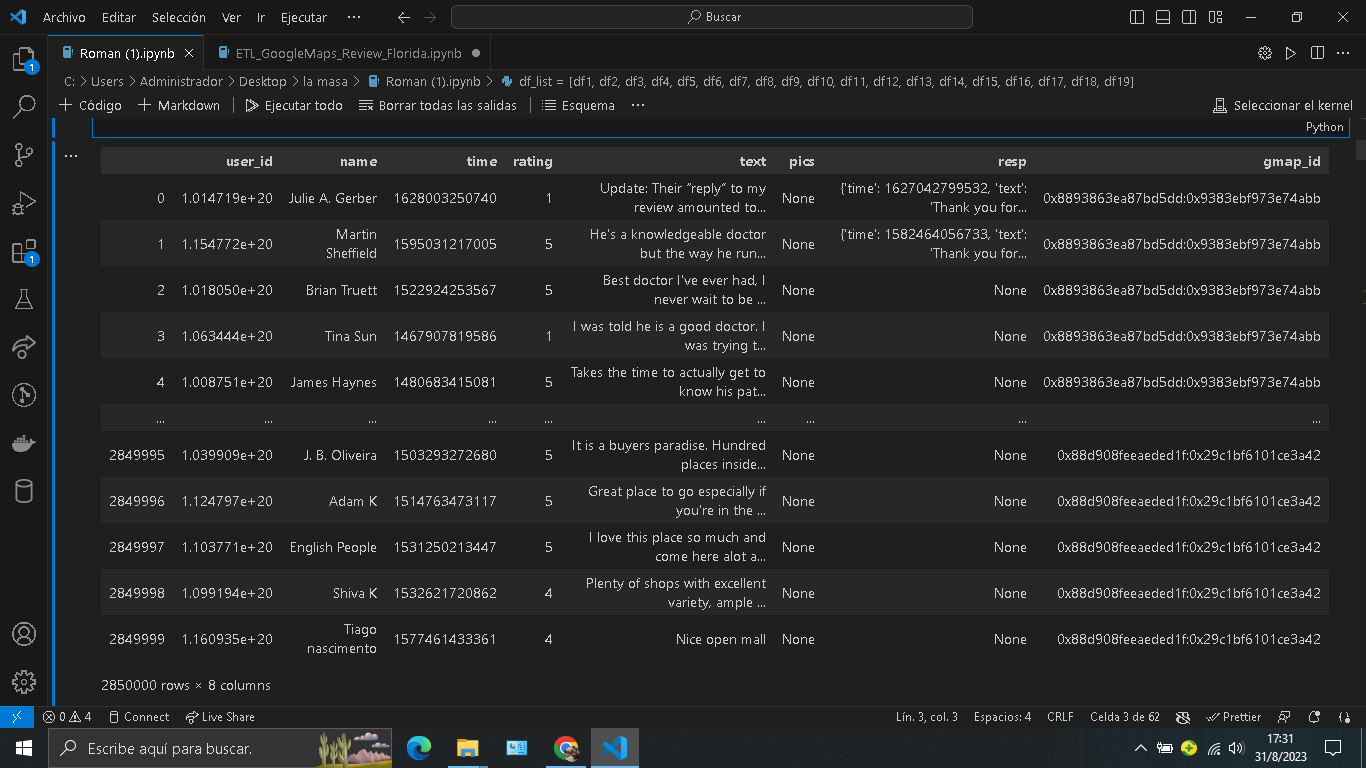

En el primer vistazo, lo que más me hizo ruido fue la columna 'time' ya que estaba en un formato que desconocía, entonces busque que significaba ese número tan largo, y encontré como convertirlo en un formato que yo conociera.

In [ ]:
import datetime
# Valor de tiempo en milisegundos
for i in range(0, 2850000):
  df['time'][i] = datetime.datetime.fromtimestamp(df['time'][i]/1000.0)
# Convertir a fecha y hora
df

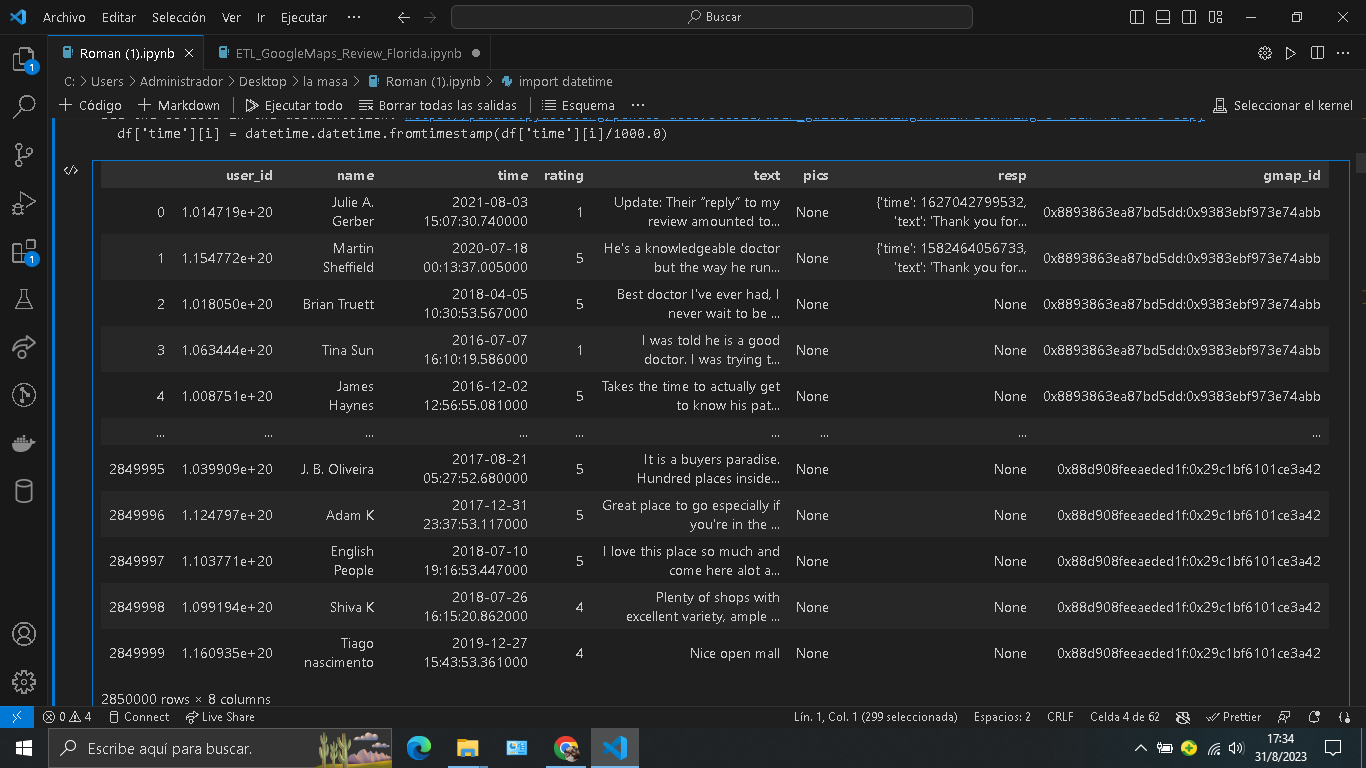

luego pense que era mas útil si dividía la columna 'time' en dos, una para la fecha y otra para la hora, ya que puede sernos mas útil para futuros filtros

In [ ]:
#Creamos las columnas fecha y hora a partir de 'Time'
df['time'] = pd.to_datetime(df['time'])
df.insert(3, 'Date', '')
df.insert(4, 'Hour', '')
df['Date'] = df['time'].dt.date
df['Hour'] = df['time'].dt.time
df

lo siguiente que se me ocurrió, fue que no nos sirve de nada tener una columna con las fotos de las reviews, por lo que simplemente prefiero saber si es que subieron o no una foto, esto es útil para futuros filtros ya que podría ser una posible métrica que indique que si un cliente sube foto es porque en la mayoría de casos tuvo una muy buena o mala experiencia.

In [ ]:
import numpy as np
# Reemplaza 'None' con 'No' y 'Si' en la columna 'pics'
df['pics'] = np.where(df['pics'].isnull(), 'No', 'Si')

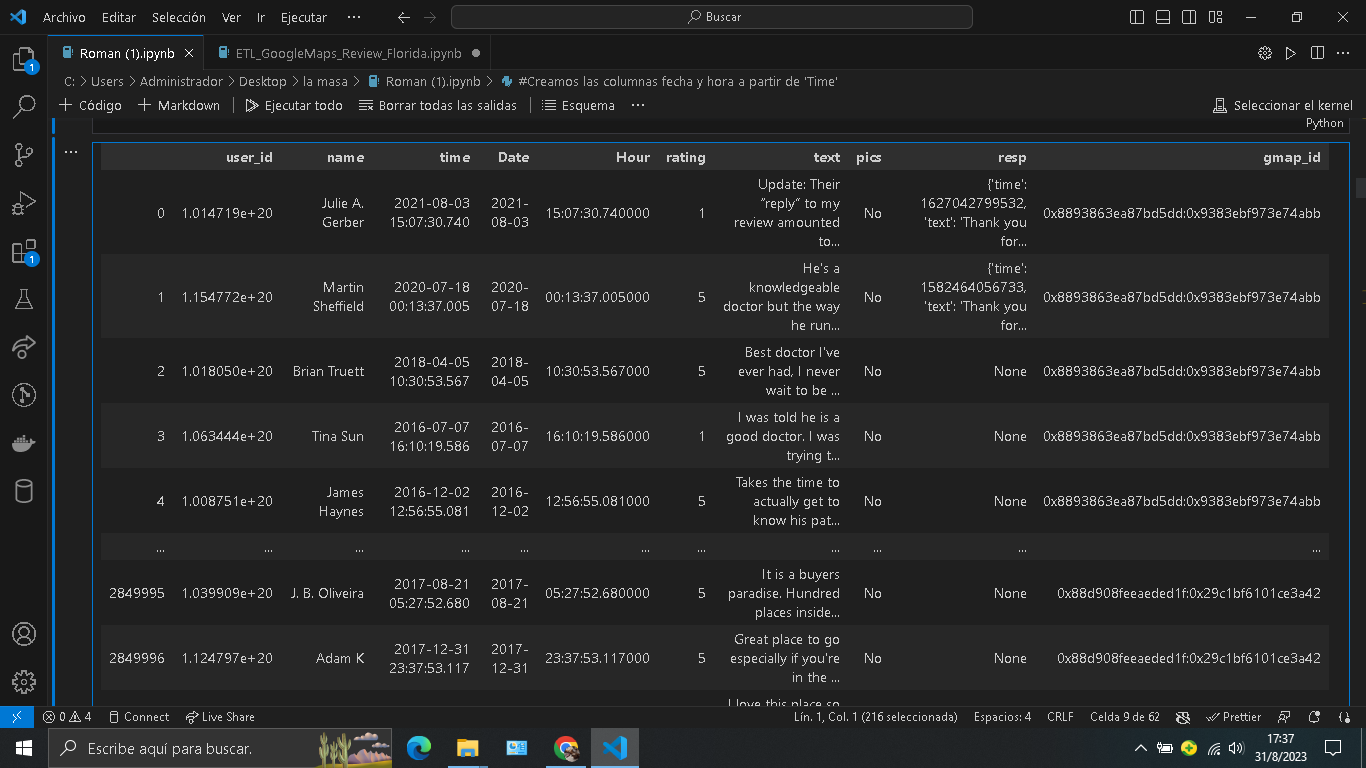

Como vemos en la foto, la columna 'resp' cuenta con un diccionario, por lo que decidí desanidarlo para ver que datos se encontraban

In [ ]:
# Esta columna contiene diccionarios o valores None

# Define una función para extraer la parte 'text' de un diccionario
def extract_text(data):
    if isinstance(data, dict) and 'text' in data:
        return data['text']
    return None
def extract_text2(data):
    if isinstance(data, dict) and 'time' in data:
        return data['time']
    return None

# Aplica la función a la columna 'data' y crea una nueva columna 'text'
df['resp_text'] = df['resp'].apply(extract_text)
df['resp_time'] = df['resp'].apply(extract_text2)
pd.set_option('display.float_format', '{:.0f}'.format)
for i in range(0, 2850000):
    if pd.notna(df['resp_time'][i]):  # Verificar si el valor no es nulo
        df['resp_time'][i] = datetime.datetime.fromtimestamp(df['resp_time'][i]/1000.0)
df

me encontré con dos títulos, 'time' (osea la fecha) y 'text' (osea la respuesta a la valoración del cliente), por lo que creí que lo mejor era crear dos columnas nuevas a partir de esos datos, y son resp_time y resp_text:

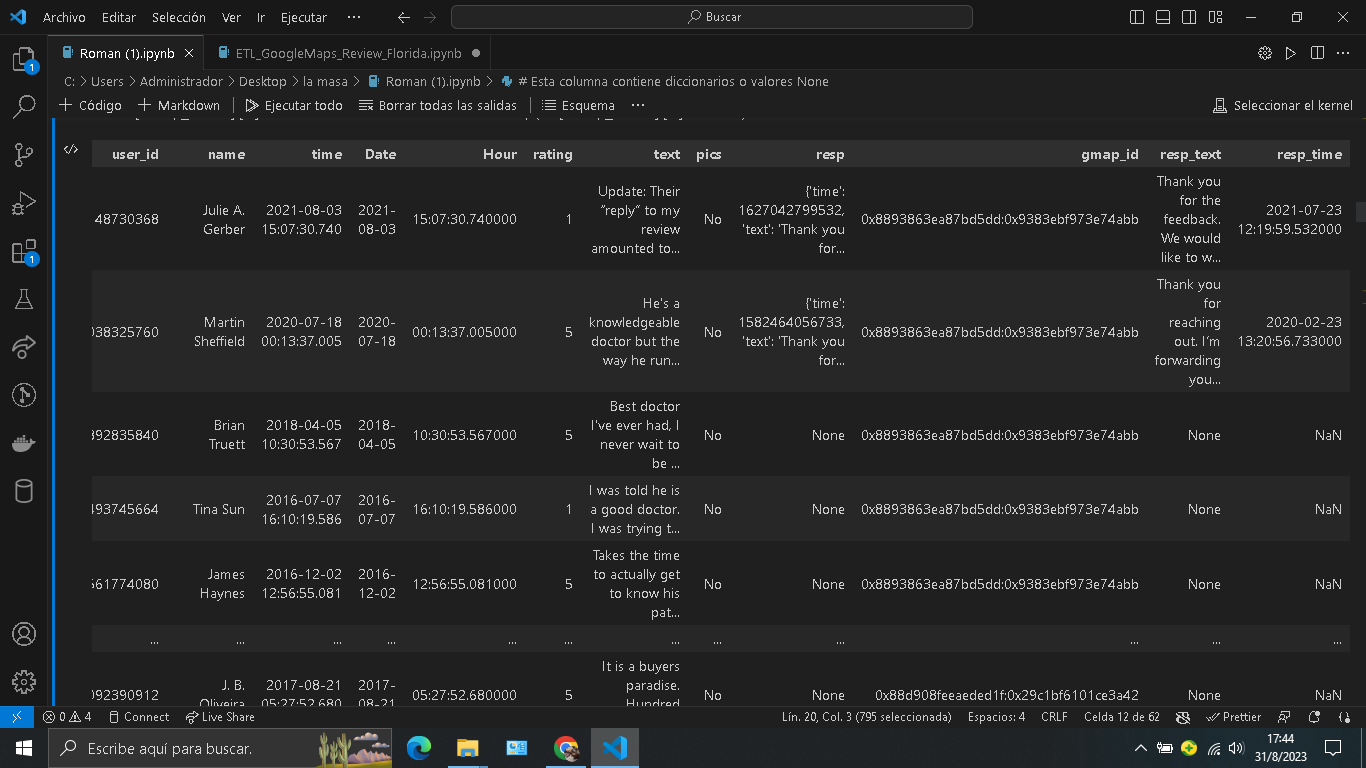

y ya que tanto la columna 'resp' como la columna 'time', que fue anteriormente procesada, no eran de utilidad debido a que esos datos habían sido presentados en otras columnas, decidí eliminarlas.

In [ ]:
#elimino dos columnas ya inservibles
df = df.drop(['time', 'resp'], axis=1)

#dropeo filas duplicadas
df = df.drop_duplicates()

y ese fue todo el ETL realizado para este dataset, aunque posteriormente a partir de la columna 'gmap_id' planeamos unirlo con otro de metadata de Google Maps.

In [ ]:
#lo unico que quedaba era exportarlo con las modificaciónes realizadas.
df.to_csv('/content/drive/MyDrive/Otros/googlemaps_review_florida.csv', escapechar='\\')